In [3]:
# ============================
# By: Imam Cholissodin | imamcs@ub.ac.id
# Dosen Fakultas Ilmu Komputer (Filkom)
# Universitas Brawijaya (UB)
# Tgl 30 Juli 2020, 
# Semoga Bermanfaat. Aamiin :D
# ====================================
# 
# Kode Program v1.05: Big Data App in Silico to Determining Modelling Covid-19 
# Medicinal by Optimizing Dosage of Compound Mixture with Deep AI based ELM PSO Using Spark
# 
# 2nd International Seminar Smart Molecule of Natural Resources (ISSMART 2020), 
# "Smart Molecule from Natural Resources for Global Pandemic Diseases”, 
# Malang August 25 - 26 2020, Online seminar (Zoom & Google Meet)
# 

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
# Buat Folder, misal "Big_Data_App_For_Covid_19" di Gdrive
import os
os.chdir("/content/drive/My Drive")
if not os.path.exists('Big_Data_App_For_Covid_19'):
  os.makedirs('Big_Data_App_For_Covid_19')
  #print('Path blm ada')
else:
  print('Path sdh ada')
os.chdir("/content/drive/My Drive/Big_Data_App_For_Covid_19")
!pwd

Path sdh ada
/content/drive/My Drive/Big_Data_App_For_Covid_19


In [7]:
# Intalasi Spark
import os
os.chdir("/")

!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.1/spark-2.4.1-bin-hadoop2.7.tgz
!tar xf spark-2.4.1-bin-hadoop2.7.tgz
!pip install -q findspark
# !pip install -q streamlit

# import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/spark-2.4.1-bin-hadoop2.7"

import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

import pyspark
from pyspark.context import SparkContext
spark = SparkSession\
        .builder\
        .appName("Map Pada Spark")\
        .getOrCreate()
        
#sc = SparkContext.getOrCreate()
sc = spark.sparkContext

os.chdir("/content/drive/My Drive/Big_Data_App_For_Covid_19")
!pwd

print('PySpark Siyaap :D')

# start code part 1
# Komputasi dengan skema pada pyspark RDD ----> Start :D
# ----------------------------------
# 
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import style
import humanize
from datetime import datetime, timezone
from time import gmtime, strftime
import pytz
import csv
from itertools import zip_longest
import random

# set atau get nilai parameter ELM dengan PySpark untuk inisialisasi
# my def 
def myrandfloat(mbaris,nkolom,lower,upper):
  #BatasRANDplusOne=10000
  BatasRANDplusOne=max(10000,2*np.math.ceil(upper))
  #mbaris=1
  #nkolom=1
  Rand_Sample=np.random.randint(BatasRANDplusOne,size=(mbaris,nkolom))
  min_Rand_Sample = 0
  max_Rand_Sample = BatasRANDplusOne - 1
  upper_boundary= upper
  lower_boundary= lower
  normalize_Rand_Sample_minMax=(((Rand_Sample-min_Rand_Sample)/(max_Rand_Sample-min_Rand_Sample))*(upper_boundary-lower_boundary))+lower_boundary
  return normalize_Rand_Sample_minMax
# end code part 1

# start code part 2
# set param, misal dengan berikut (dengan dataset sintesis atau dummy untuk simulasi di komputer seperti konsep in silico):
file_input  	= 'file:///content/drive/My Drive/Big_Data_App_For_Covid_19/Dataset Dummy v2.01.csv'
dir_output 	= 'file:///content/drive/My Drive/Big_Data_App_For_Covid_19/'
# activation function (af)
af		= "sigmoid"

#Load data dummy by rdd
data_rdd = sc.textFile(file_input)

# get header atau nama-nama koom pada data dummy (Dataset Dummy v2.01.csv)
header_rdd = data_rdd.take(1)

# get nama kolom fitur
list_nama_kolom_fitur_by_rdd = ''.join(header_rdd).split(',')[2:12]
print(list_nama_kolom_fitur_by_rdd)
byk_fitur_by_rdd = len(list_nama_kolom_fitur_by_rdd)
print('byk fitur = ', byk_fitur_by_rdd)

print()

# get nama kolom target
list_nama_kolom_target_by_rdd = ''.join(header_rdd).split(',')[12:]
print(list_nama_kolom_target_by_rdd)
byk_target_by_rdd = len(list_nama_kolom_target_by_rdd)
print('byk target = ', byk_target_by_rdd)

#print(data.collect())

# set param utk non-command prompt dengan Pysspark RDD
# jumlah_hidden, misal = 5
jumlah_fitur  	= byk_fitur_by_rdd
jumlah_hidden 	= 5		

# print()

# get raw_content_by_rdd dgn zipWithIndex dan filter
# untuk mengambil content tiap baris selain header 
raw_content_by_rdd = data_rdd.zipWithIndex().filter(lambda kv: kv[1] > 0).keys()
#print(raw_content_by_rdd.collect())

#print()

# get raw_fitur_by_rdd
# untuk mengambil isi dalam content dgn map atau mengambil isi secara spesifik tiap barisnya
# lalu convertt str menjadi float
raw_fitur_by_rdd = raw_content_by_rdd.map(lambda x: ''.join(str(x)).split(',')[2:12]).map(lambda lines: [float (x) for x in lines])
# print('raw_fitur_by_rdd.collect():')
# print(raw_fitur_by_rdd.collect())

# print()

# get raw_target_by_rdd
# untuk mengambil isi dalam content dgn map atau mengambil isi secara spesifik tiap barisnya
# lalu convert str menjadi float
raw_target_by_rdd = raw_content_by_rdd.map(lambda x: ''.join(str(x)).split(',')[12:]).map(lambda lines: [float (x) for x in lines])
# print('raw_fitur_by_rdd.collect():')
# print(raw_target_by_rdd.collect())

# print()

# Convert RDD fitur dan target to numpy
np_raw_fitur_by_rdd = np.array(raw_fitur_by_rdd.collect())
# print(np_raw_fitur_by_rdd.shape)

np_raw_target_by_rdd = np.array(raw_target_by_rdd.collect())
# print(np_raw_target_by_rdd.shape)

# print()

# set info_minimize_maximize untuk menunjukkan mana fitur dari target yang mau
# diminimalkan, mana yang mau dimaksimalkan nilainya 
# untuk penghitungan nilai fitness.
# misal fitur target yg diminimalkan dgn tanda angka integer --> 0
# dan fitur target yg dimaksimalkan dgn tanda angka integer --> 1
# 
# 'Demam dari Suhu Tubuh (Celcius/100)' --> 0
# 'Batuk Kering' --> 0
# 'Lelu dan Lelah' --> 0 
# 'Sesak Nafas' --> 0
# 'Nyeri/ Ngilu Sendi' --> 0
# 'Sakit Kepala' --> 0
# 'Pilek' --> 0
# 'Sakit Tenggorokan' --> 0
# 'Diare' --> 0
# 
info_minimize_maximize = sc.broadcast(np.array([0,0,0,0,0,0,0,0,0],np.int))
print('info_minimize_maximize:')
print(info_minimize_maximize.value)
# end code part 2

# start code part 3
# --------------------
# Define beberapa fungsi untuk ELM
# 
#Activation function
relu = np.vectorize(lambda x : x if x>0 else 0)
lrelu = np.vectorize(lambda x : x if x>0 else 0.01*x)
linear = np.vectorize(lambda x : x) 
sigmoid = np.vectorize(lambda x : 1/(1+math.exp(-x)))

if af == "relu":
	activation_function = relu
elif af == "leaky_relu":
	activation_function = lrelu
elif af == "sigmoid":
	activation_function = sigmoid
else:
	activation_function = linear
	
#Transform Function untuk hitung mastrix H
#mytransform = lambda x : activation_function((np.dot(x, hidden.value) + bias.value)).tolist()
# mytransform = lambda x : activation_function((np.dot(x, np.transpose(bobot.value)) + bias.value))
mytransform = lambda x,y,z : activation_function((np.dot(x, np.transpose(y.value)) + z.value))

# end code part 3

# start code part 4
# -----------------
# Membuat ELM Train dan Testing dalam bentuk def
def ELMTrain(jumlah_hidden,jumlah_fitur,np_raw_fitur_by_rdd,np_raw_target_by_rdd):
  # bobot atau input_weight
  bobot = sc.broadcast(myrandfloat(jumlah_hidden,jumlah_fitur,-1.0,1.0))
  bias = sc.broadcast(myrandfloat(jumlah_hidden,1,-0.5,0.5).flatten())

  # 2. hitung matrix H
  # print('hitung matrix H:')
  #h = 1/(1 + np.exp(-(np.dot(data_training[:, :banyak_fitur], np.transpose(bobot)) + bias)))
  #h = 1/(1 + np.exp(-(np.dot(np_raw_fitur_by_rdd, np.transpose(bobot)) + bias)))
  h = sc.broadcast(mytransform(np_raw_fitur_by_rdd,bobot,bias))
  #print(np.array(h).shape)
  # print(h.value.shape)
  # print(h.value.dtype)

  # print()

  # 3. hitung matrix Hplus
  # print('hitung matrix Hplus:')
  h_plus = sc.broadcast(np.dot(np.linalg.inv(np.dot(np.transpose(h.value),h.value)),np.transpose(h.value)))
  # print(h_plus.value.shape)
  # print(h_plus.value.dtype)

  # print()

  # 4. hitung matrix bobot keluaran atau istilah lainnya  'betha_topi'
  # print('hitung output_weight:')
  output_weight = sc.broadcast(np.dot(h_plus.value, np_raw_target_by_rdd))
  # print(output_weight.value.shape)
  # print(h.value.dtype)

  return bobot,bias,output_weight

def ELMTest_For_Non_PSO_Get_Mape(np_raw_fitur_by_rdd_data_test,np_raw_target_by_rdd_data_test,bobot,bias,output_weight):
  # Testing ELM dgn RDD
  # --------------------------------------------
  # 
  # 1. Load bobot input , bias, dan output_weight atau betha_topi
  # dimana paramter yg mewakili adalah bobot, bias, output_weight
  #
  # 2. load data test, misal data testnya berikut:
  np_raw_fitur_by_rdd_test = sc.broadcast(np_raw_fitur_by_rdd_data_test.copy())

  # 3. hitung matrix h_hest
  h_test = sc.broadcast(1/(1 + np.exp(-(np.dot(np_raw_fitur_by_rdd_test.value, np.transpose(bobot.value)) + bias.value))))
  #print(h_test.value.shape)

  # 4. Hitung hasil prediksi atau target atau y_topi
  y_topi = sc.broadcast(np.dot(h_test.value,output_weight.value))
  #print(y_topi.value.shape)

  #print()

  # 5. hitung nilai evaluasi, misal menggunakan MAPE
  # buat def myMAPE yg return-nya detail_mape, final_single_mape = myMAPE(....)
  # 
  # Rumus MAPE yang digunakan, jika data aktualnya ada yang nol atau tidak ada yg nol
  # dan untuk memastikan MAPE pada interval = [0%;100%] --> dengan kondisi ini
  # Ref: (Berretti,Thampi,danSrivastava,2015) dalam 
  # Hapsari,KD.,Cholissodin,I.,Santoso,E.,2016 --> link: https://bit.ly/2EJRzXE
  # 
  konstanta_smooting = 0.00000001
  c = konstanta_smooting

  aktual = sc.broadcast(np_raw_target_by_rdd_data_test.copy())
  predict = sc.broadcast(y_topi.value.copy())

  mape_init = np.abs((( (aktual.value+c) - (predict.value+c) )/ (aktual.value+c) )*100)
  mape_norm = np.sum(np.where(mape_init>100, 100, mape_init))/(len(predict.value)*byk_fitur_by_rdd)
  #print('MAPE Norm [0% ; 100%] = ', mape_norm.round(2),'%')

  #print()

  # detail mape
  #print('mape_init = ', mape_init.round(2),'%')
  #print(mape_init.shape)

  return y_topi, mape_norm

# info_minimize_maximize untuk menunjukkan mana fitur dari target yang mau
# diminimalkan, mana yang mau dimaksimalkan nilainya
# untuk penghitungan nilai fitness.
# 
def ELMTest_For_PSO_Get_Fitness(np_data_test,info_minimize_maximize,bobot,bias,output_weight):
  # Testing ELM dgn RDD
  # --------------------------------------------
  # 
  # 1. Load bobot input , bias, dan output_weight atau betha_topi
  # dimana paramter yg mewakili adalah bobot, bias, output_weight
  #
  # 2. load data test, misal data testnya berikut:
  np_raw_fitur_by_rdd_test = sc.broadcast(np_data_test.copy())

  # 3. hitung matrix h_hest
  h_test = sc.broadcast(1/(1 + np.exp(-(np.dot(np_raw_fitur_by_rdd_test.value, np.transpose(bobot.value)) + bias.value))))
  #print(h_test.value.shape)

  # 4. Hitung hasil prediksi atau target atau y_topi
  y_topi = sc.broadcast(np.dot(h_test.value,output_weight.value))
  #print(y_topi.value.shape)
  #print(y_topi.value.flatten().shape)
  #print(y_topi.value)
  #print(np.clip(y_topi.value,0,1))

  # coba aktifkan np.clip utk menghindari divide by zero
  y_topi = sc.broadcast(np.clip(y_topi.value,0,1))

  # hitung fitness base y_topi dan info_minimize_maximize
  fitness = 0.
  for i in range(len(info_minimize_maximize.value)):
    if info_minimize_maximize.value[i] == 0:
      #print('0')
      #print('fitness awal = ', fitness)
      #fitness += 1/(1+ y_topi.value[i])
      fitness += 1/(1+ y_topi.value.flatten()[i])
      #print('fitness akhir = ', fitness)
      #print()
    else:
      #print('1')
      #print('fitness awal = ', fitness)
      fitness += y_topi.value.flatten()[i]
      #print('fitness akhir = ', fitness)
      #print()

  return y_topi, fitness
# end code part 4

# start code part 5
# ---------------------
# misal melakukan training ELM dengan fungsi ELMTrain
get_bobot,get_bias,get_output_weight = \
ELMTrain(jumlah_hidden,jumlah_fitur,np_raw_fitur_by_rdd,np_raw_target_by_rdd)
# end code part 5

# start code part 6
# -----------------------
def FnGetFitnessNbestIndividuIPSODL(X_or_P_or_G,info_minimize_maximize,bobot,bias,output_weight):
  # pop_size=size(X_or_P_or_G,1);
  pop_size = X_or_P_or_G.shape[0]
  # Best_Partikel=zeros(1,size(X_or_P_or_G,2));

  # FitnessAll=zeros(pop_size,1);
  FitnessAll = myrandfloat(pop_size,1,0,0).flatten()

  for i in range(pop_size):
    _, FitnessAll[i] = ELMTest_For_PSO_Get_Fitness(X_or_P_or_G[i],info_minimize_maximize,bobot,bias,output_weight)

  # % mengambil X_or_P_or_G yang fitness-nya terbaik
  FitnessGbest = max(FitnessAll)
  index_Gbest = np.argmax(FitnessAll)
  Gbest = X_or_P_or_G[index_Gbest].copy()

  return FitnessAll,FitnessGbest,Gbest

def FnGetFitnessIPSODL(X_or_P_or_G,info_minimize_maximize,bobot,bias,output_weight):
  # pop_size=size(X_or_P_or_G,1);
  pop_size = X_or_P_or_G.shape[0]
  # Fitness=zeros(pop_size,1);
  Fitness = myrandfloat(pop_size,1,0,0).flatten()

  # for i=1:pop_size
  for i in range(pop_size):
    # Fitness[i]=1/FnArsitekPSODLCNNeLM(X_or_P_or_G(i,:))
    _ , Fitness[i] = ELMTest_For_PSO_Get_Fitness(X_or_P_or_G[i],info_minimize_maximize,bobot,bias,output_weight)

  # % mencari indexsorting secara descending
  IndexAwal = myrandfloat(pop_size,1,0,0).astype('int64').flatten()
  # for i=1:pop_size
  for i in range(pop_size):
    # IndexAwal(i) = i;
    IndexAwal[i] = i

  FitnessAwal= Fitness.copy()

  for i in range(pop_size):
    TempNilaiFx = Fitness[i].copy()
    TempIndexAwal = IndexAwal[i].copy()
    # for j=i+1:pop_size
    for j in range(i+1,pop_size):
      if (Fitness[j] > TempNilaiFx):
        TempNilaiFx = Fitness[j].copy()
        Fitness[j] = Fitness[i].copy()
        Fitness[i] = TempNilaiFx.copy()
        TempIndexAwal = IndexAwal[j].copy()
        IndexAwal[j] = IndexAwal[i].copy()
        IndexAwal[i] = TempIndexAwal.copy()

  # %[FitnessAwal Fitness];
  # %IndexAwal;

  # % pause

  IndexSortingDesc = IndexAwal.copy()
  return FitnessAwal,IndexSortingDesc

def FnUpdatePbestGbestIPSODL(FitnessAllPbestOld,FitnessAllXbaru,FitnessGbestOld,Xbaru,PbestOld,GbestOld):
  Update_Pbest = PbestOld.copy()
  FitnessAll_Update_Pbest = FitnessAllPbestOld.copy()

  FitnessAllPbestOld_minus_FitnessAllXbaru = \
  FitnessAllPbestOld-FitnessAllXbaru

  # % jika nilai selisih negatif, maka nilai Fitness pada Xbaru lebih besar
  # % mencari indek yang nilai selisihnya negatif
  idx_selisih_negatif = np.where(FitnessAllPbestOld_minus_FitnessAllXbaru<0)

  # idx_find_neg = np.where(a5 < 0)
  # print(np.array(idx_selisih_negatif).shape[1])

  if(np.array(idx_selisih_negatif).shape[1] > 0):
    Update_Pbest[idx_selisih_negatif] = Xbaru[idx_selisih_negatif].copy()
    FitnessAll_Update_Pbest[idx_selisih_negatif] = FitnessAllXbaru[idx_selisih_negatif].copy()

  # % mencari nilai_MaxFitness dan indexnya dari FitnessAll_Update_Pbest
  nilai_MaxFitness,index_MaxFitness=max(FitnessAll_Update_Pbest),np.argmax(FitnessAll_Update_Pbest)
  Calon_Gbest = Update_Pbest[index_MaxFitness].copy()

  # idx,value = np.argmax(a5),max(a5)

  FitnessCalon_Gbest = nilai_MaxFitness.copy()

  # % membandingkan Calon_Gbest dengan GbestOld dari nilai fitness-nya
  if(FitnessCalon_Gbest>FitnessGbestOld):
    Fitness_Update_Gbest = FitnessCalon_Gbest.copy()
    Update_Gbest = Calon_Gbest.copy()
  else:
    Fitness_Update_Gbest = FitnessGbestOld.copy()
    Update_Gbest = GbestOld.copy()

  return FitnessAll_Update_Pbest,Fitness_Update_Gbest,Update_Pbest,Update_Gbest

def FnMyIPSO_DLeLM_UjiKonv(IterMaxPSO,pop_size,byk_fitur_by_rdd,info_minimize_maximize,get_bobot,get_bias,get_output_weight):
  # PSO untuk optimasi dosis senyawa utk kandidat obat Covid-19 ---> koding fix tapi masih belum dicleaning

  # %% Tentang PTVPSO (Chen, Hui, Ling, at all, 2011)
  # % Algoritma particle swarm optimization (PSO) 
  # % merupakan algoritma optimasi yang pertama kali dikenalkan oleh Kennedy 
  # % dan Eberhart pada tahun 1995.
  # % 
  # % Time variant yang digunakan adalah 
  # % time varying acceleration coefficients (TVAC) dan 
  # % time varying inertia weight (TVIW) Dimana,
  # % TVIW (wmin = 0.4 dan wmax = 0.9) 
  # % Nilai range c1 dan c2 (TVAC) yang digunakan adalah 
  # % (c1i=2.5, c1f=0.5) dan c2i=0.5, c2f=2.5) karena terbukti optimal. 
  # % c1 dan c2 (cognitive dan social components).
  # % w (bobot inersia), d (banyaknya dimensi data, 
  # % atau banyaknya fitur data), tmax (iterasi max.)
  # % ----------------------------------------------------------------------

  # %% koding PSO
  # % ========================================
  # %% Inisialisasi
  # pop_size=5;
  # % byk_dimensi=4;
  # IterMaxPSO=10;
  wmin=0.4
  wmax=0.9
  c1i=2.5 
  c1f=0.5
  c2i=0.5
  c2f=2.5
  tmax = IterMaxPSO

  # byk_dim_data_input = 10
  # %% Batas Bawah dan Batas Atas Parameter yang dioptimasi, untuk X
  # SLCcLR_lower = [k_padding_lower FC1_Wjk_lower FC2_Wjk_lower FC3_Wjk_lower];
  # SLCcLR_upper = [k_padding_upper FC1_Wjk_upper FC2_Wjk_upper FC3_Wjk_upper];

  SLCcLR_lower = myrandfloat(byk_fitur_by_rdd,1,0,0).flatten()
  SLCcLR_upper = myrandfloat(byk_fitur_by_rdd,1,1,1).flatten()

  byk_dimensi=byk_fitur_by_rdd

  # % replika matrik, dari satu baris menjadi barisnya sebanyak pop_size
  repmat_SLCcLR_lower = SLCcLR_lower.copy()
  repmat_SLCcLR_upper = SLCcLR_upper.copy()

  # hitung delta
  SLCcLR_delta = SLCcLR_upper - SLCcLR_lower
  repmat_SLCcLR_delta = SLCcLR_delta.copy()

  # %% Batas Bawah dan Batas Atas Parameter yang dioptimasi, untuk V
  prosentase_V = 0.6
  V_SLCcLR_lower = -prosentase_V*SLCcLR_upper
  V_SLCcLR_upper = prosentase_V*SLCcLR_upper

  # % replika matrik, dari satu baris menjadi barisnya sebanyak pop_size
  repmat_V_SLCcLR_lower = V_SLCcLR_lower.copy()
  repmat_V_SLCcLR_upper = V_SLCcLR_upper.copy()


  # %% Generate populasi awal
  # % init size
  X = myrandfloat(pop_size,byk_dimensi,0,0)
  V = myrandfloat(pop_size,byk_dimensi,0,0)
  Pbest = myrandfloat(pop_size,byk_dimensi,0,0)
  Gbest = myrandfloat(1,byk_dimensi,0,0)

  MeanFitness = myrandfloat(IterMaxPSO,1,0,0).flatten()
  MaxFitness = MeanFitness.copy()

  # for t=0:IterMaxPSO
  for t in range(IterMaxPSO):
    # print('iter = ', t)    
    # % hitung nilai w, c1, c2, r1, r2
    w = wmin + ((wmax-wmin)*((tmax-t)/tmax))
    c1 = ((c1f-c1i)*(t/tmax)) + c1i
    c2 = ((c2f-c2i)*(t/tmax)) + c2i
    # r1 = rand(1,1); % random [0,1] dengan distribusi uniform
    r1 = myrandfloat(1,1,0,1).flatten()[0]
    r2 = myrandfloat(1,1,0,1).flatten()[0]
    
    if(t==0):         
      # % inisialisasi posisi awal
      X = repmat_SLCcLR_lower + myrandfloat(pop_size,byk_dimensi,0,1)*repmat_SLCcLR_delta
      
      # % inisialisasi kecepatan awal
      # V;
      
      # % inisialisasi Pbest dan Gbest
      Pbest = X.copy()
      FitnessAllPbest,FitnessGbest,Gbest = \
      FnGetFitnessNbestIndividuIPSODL(Pbest,info_minimize_maximize,get_bobot,get_bias,get_output_weight)
        
    else:
      # % update kecepatan 
      V = (w*V)+(c1*r1*(Pbest-X))+(c2*r2*(Gbest-X))
      V = np.clip(V,repmat_V_SLCcLR_lower,repmat_V_SLCcLR_upper)
      
      # % update posisi
      X = X + V
      X = np.clip(X,repmat_SLCcLR_lower,repmat_SLCcLR_upper)
      
      # % hitung nilai fitness X
      FitnessAllX,IndexSortingDesc = FnGetFitnessIPSODL(X,info_minimize_maximize,get_bobot,get_bias,get_output_weight)
      
      # % update Pbest dan Gbest
      FitnessAll_Update_Pbest,Fitness_Update_Gbest,Update_Pbest,Update_Gbest = \
      FnUpdatePbestGbestIPSODL(FitnessAllPbest,FitnessAllX,FitnessGbest,X,Pbest,Gbest)

      FitnessAllPbest = FitnessAll_Update_Pbest.copy()
      FitnessGbest = Fitness_Update_Gbest.copy()
      Pbest = Update_Pbest.copy()
      Gbest = Update_Gbest.copy()
      
      # % simpan rata-rata dan max fitness tiap iterasi
      MeanFitness[t] = np.mean(FitnessAllPbest)
      MaxFitness[t] = max(FitnessAllPbest)

      # coba random injection
      if(t%5==0):
        # byk partikel yang direplace untuk di-injection
        byk_partikel_rand_injection = int(0.2*pop_size)
        
        X[IndexSortingDesc[pop_size-byk_partikel_rand_injection:]] = \
        repmat_SLCcLR_lower + myrandfloat(byk_partikel_rand_injection,byk_dimensi,0,1)*repmat_SLCcLR_delta

        # % hitung nilai fitness X
        FitnessAllX,IndexSortingDesc = FnGetFitnessIPSODL(X,info_minimize_maximize,get_bobot,get_bias,get_output_weight)
        
        # % update Pbest dan Gbest
        FitnessAll_Update_Pbest,Fitness_Update_Gbest,Update_Pbest,Update_Gbest = \
        FnUpdatePbestGbestIPSODL(FitnessAllPbest,FitnessAllX,FitnessGbest,X,Pbest,Gbest)
            
        FitnessAllPbest = FitnessAll_Update_Pbest.copy()
        FitnessGbest = Fitness_Update_Gbest.copy()
        Pbest = Update_Pbest.copy()
        Gbest = Update_Gbest.copy()

  print()

  # % menampilkan individu terbaik dan nilai Akurasinya
  print('Gbest', Gbest.round(2))
  print('FitnessGbest', FitnessGbest.round(2))

  print()

  # menampilkan y_topi dari Gbest
  np_partikel_test = sc.broadcast(Gbest)
  get_y_topi, get_fitness = ELMTest_For_PSO_Get_Fitness(np_partikel_test.value,info_minimize_maximize,get_bobot,get_bias,get_output_weight)
  print('get_y_topi = ', get_y_topi.value.flatten().round(2))
  # print('get_y_topi after np.clip [0;1] = ', np.clip(get_y_topi.value.flatten(),0,1).round(2))
  # print('Fitness = ', get_fitness.round(2))
  # print('Fitness = ', get_fitness)

  print()
  print('Done....! :D ')
  return Gbest,FitnessGbest,get_y_topi,MeanFitness,MaxFitness

# end code part 5


/content/drive/My Drive/Big_Data_App_For_Covid_19
PySpark Siyaap :D
['Jahe (Ginger)', 'Kunyit (Turmeric)', 'Madu (Honey)', 'Sari Kurma (Dates)', 'Zaitun (Olive)', 'Habbatussauda (Black Seed)', 'Propolis', 'Kalsium (Calcium)', 'Vitamin C', 'Vitamin E']
byk fitur =  10

['Demam dari Suhu Tubuh (Celcius/100)', 'Batuk Kering', 'Lelu dan Lelah', 'Sesak Nafas', 'Nyeri/ Ngilu Sendi', 'Sakit Kepala', 'Pilek', 'Sakit Tenggorokan', 'Diare']
byk target =  9
info_minimize_maximize:
[0 0 0 0 0 0 0 0 0]



Gbest [1.   0.   1.   1.   0.   1.   0.87 0.   1.   0.  ]
FitnessGbest 6.71

get_y_topi =  [0.27 0.22 0.35 0.49 0.47 0.41 0.27 0.37 0.26]

Done....! :D 

Gbest [1. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
FitnessGbest 6.54

get_y_topi =  [0.37 0.34 0.48 0.36 0.48 0.25 0.4  0.38 0.36]

Done....! :D 

Gbest [1.   0.   0.05 1.   0.27 0.8  1.   1.   0.   0.  ]
FitnessGbest 6.5

get_y_topi =  [0.24 0.2  0.42 0.76 0.62 0.4  0.27 0.5  0.25]

Done....! :D 

Gbest [1.   0.27 0.72 1.   0.03 0.21 0.   0.   0.   0.  ]
FitnessGbest 6.51

get_y_topi =  [0.34 0.31 0.41 0.47 0.48 0.39 0.33 0.4  0.32]

Done....! :D 

Gbest [1. 0. 1. 1. 0. 0. 1. 0. 1. 0.]
FitnessGbest 6.66

get_y_topi =  [0.29 0.25 0.39 0.49 0.55 0.37 0.27 0.39 0.22]

Done....! :D 

Get best of the best from all Gbest (included Y_topi & fitness nya):
----------------------------------------------------------------------------------------------------
Gbest =  [1.   0.   1.   1.   0.   1.   0.87 0.   1.   0.  ]
FitnessGbest =  6.71
y_topi =  [0.27 0.

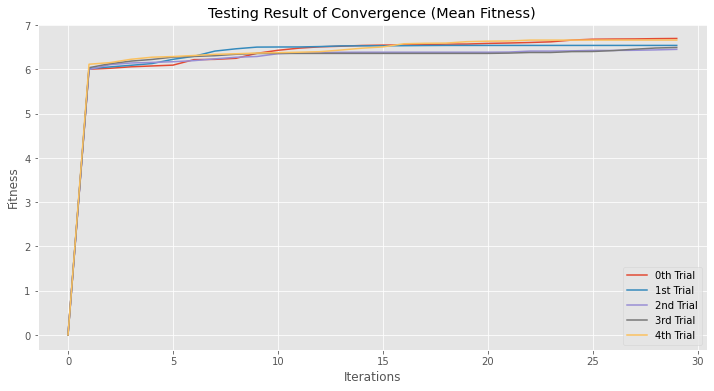

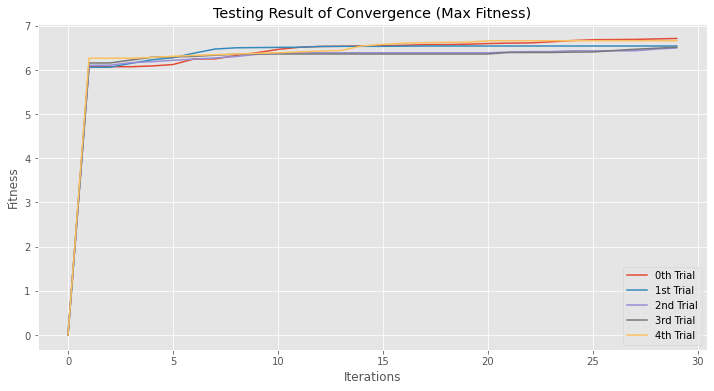

In [7]:
# Melakukan pengujian konvergensi PSO dengan FnMyIPSO_DLeLM_UjiKonv +
# Simpan hasil dalam csv dan grafik fitness dlm *.jpg
# 
# nCoba = 10
# IterMaxPSO = 500
# pop_size = 50

nCoba = 5
IterMaxPSO = 30
pop_size = 5

# get_Gbest_cell =np.zeros((nCoba,),dtype=np.object)
# kesetaraan cell dgn dict
get_all_Gbest_on_cell={}
get_all_FitnessGbest_on_cell={}
get_all_get_y_topi_on_cell={}
get_all_MeanFitness_on_cell={}
get_all_MaxFitness_on_cell={}

# get_best_of_the_best_from_all =np.zeros((nCoba,),dtype=np.object)
get_best_of_the_best_from_all={}

for i in range(nCoba):
  get_all_Gbest_on_cell[i],\
  get_all_FitnessGbest_on_cell[i],\
  get_all_get_y_topi_on_cell[i],\
  get_all_MeanFitness_on_cell[i],\
  get_all_MaxFitness_on_cell[i] = \
  FnMyIPSO_DLeLM_UjiKonv(IterMaxPSO,pop_size,byk_fitur_by_rdd,info_minimize_maximize,get_bobot,get_bias,get_output_weight)

  #get best of the best from all Gbest (included Y_topi & fitness nya)
  # get_best_of_the_best_from_all[i]={}
  if i==0:
    get_best_of_the_best_from_all['Gbest'] = get_all_Gbest_on_cell[i]
    get_best_of_the_best_from_all['FitnessGbest'] = [get_all_FitnessGbest_on_cell[i]]
    get_best_of_the_best_from_all['y_topi'] = get_all_get_y_topi_on_cell[i].value
  else:
    if(get_best_of_the_best_from_all['FitnessGbest'][0] < get_all_FitnessGbest_on_cell[i]):
      get_best_of_the_best_from_all['Gbest'] = get_all_Gbest_on_cell[i]
      get_best_of_the_best_from_all['FitnessGbest'] = [get_all_FitnessGbest_on_cell[i]]
      get_best_of_the_best_from_all['y_topi'] = get_all_get_y_topi_on_cell[i].value

print()
print('Get best of the best from all Gbest (included Y_topi & fitness nya):')
print('-----'*20)
print('Gbest = ',get_best_of_the_best_from_all['Gbest'].round(2))
print('FitnessGbest = ',get_best_of_the_best_from_all['FitnessGbest'][0].round(2))
print('y_topi = ',get_best_of_the_best_from_all['y_topi'].round(2))

print()

# ---------------------------------------------

# Buat Folder, dgn name_unik_path2save utk simpan hasil style transfer dan total loss-nya
name_unik_path2save = str(datetime.today().astimezone(pytz.timezone('Asia/Jakarta')).strftime('%d-%m-%Y-%H-%M-%S'))
# import os
# os.chdir("/content/drive/My Drive")
if not os.path.exists('./testing of convergence/'+name_unik_path2save):
  os.makedirs('./testing of convergence/'+name_unik_path2save)
  #print('Path blm ada')
else:
  print('Path sdh ada')
# os.chdir("/content/drive/My Drive/KeStar_Algorithm")
# !pwd

# set info_param
# nt mewakili parameter nCoba
# it mewakili parameter IterMaxPSO
# po mewakili pop_size
# gyf mewakili best of the best dari Gbest, lalu Y_Topi, lalu Fitness
info_param = 'nt-'+str(nCoba)+'-it-'+str(IterMaxPSO)+'-po-' \
+str(pop_size)+'-gyf'

nama_path_hasil = './testing of convergence/'+name_unik_path2save+'/'
nama_file_jpg_MeanFitness = nama_path_hasil+info_param+'_MeanFitness.jpg'
style.use('ggplot')
fig, ax = plt.subplots(figsize=(12, 6))    
plt.title("Testing Result of Convergence (Mean Fitness)")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
# plt.xlim(1,IterMaxPSO)
# plt.xlim(1,len(get_all_MeanFitness_on_cell[0]))
for loss,lab in zip(get_all_MeanFitness_on_cell,np.arange(nCoba)):
  plt.plot(get_all_MeanFitness_on_cell[loss],label= humanize.ordinal(lab) +' Trial')
  # plt.legend(loc='upper right')
  plt.legend(loc='lower right')
plt.savefig(nama_file_jpg_MeanFitness,dpi=100)
plt.show()

print()

nama_file_jpg_MaxFitness = nama_path_hasil+info_param+'_Maxitness.jpg'
style.use('ggplot')
fig, ax = plt.subplots(figsize=(12, 6))    
plt.title("Testing Result of Convergence (Max Fitness)")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
# plt.xlim(1,IterMaxPSO)
# plt.xlim(1,len(get_all_MeanFitness_on_cell[0]))
for loss,lab in zip(get_all_MaxFitness_on_cell,np.arange(nCoba)):
  plt.plot(get_all_MaxFitness_on_cell[loss],label= humanize.ordinal(lab) +' Trial')
  # plt.legend(loc='upper right')
  plt.legend(loc='lower right')
plt.savefig(nama_file_jpg_MaxFitness,dpi=100)
plt.show()

plt.style.use('default')

# Simpan Hasil Gbest Fitness , nantinya 'MeanFitness' dan 'MaxFitness' utk grafik evaluasi
nama_file_csv_GFY = nama_path_hasil+info_param+'_Gbest_FitnessGbest_Y_Topi.csv'
# np.savetxt(nama_file_csv_GFY, get_best_of_the_best_from_all, fmt="%d", delimiter=",")
# np.savetxt('Gbest_FitnessGbest_Y_Topi.csv', get_best_of_the_best_from_all, fmt="%d", delimiter=",")

nama_file_csv_MeanFitness= nama_path_hasil+info_param+'_MeanFitness.csv'
# np.savetxt(nama_file_csv_MeanFitness, get_all_MeanFitness_on_cell, fmt="%d", delimiter=",")
# np.savetxt('MeanFitness.csv', get_all_MeanFitness_on_cell, fmt="%d", delimiter=",")

nama_file_csv_MaxFitness= nama_path_hasil+info_param+'_MaxFitness.csv'
# np.savetxt(nama_file_csv_MaxFitness, get_all_MaxFitness_on_cell, fmt="%d", delimiter=",")
# np.savetxt('MaxFitness.csv', get_all_MaxFitness_on_cell, fmt="%d", delimiter=",")

# --------------------------
# untuk Gbest_FitnessGbest_Y_Topi
# keys = sorted(get_best_of_the_best_from_all.keys())
transposed_data = list(zip_longest(*get_best_of_the_best_from_all.values()))
# with open('Gbest_FitnessGbest_Y_Topi.csv', 'w', newline='') as f:
with open(nama_file_csv_GFY, 'w', newline='') as f:
  writer = csv.writer(f)
  writer.writerow(get_best_of_the_best_from_all.keys())
  # writer.writerow(keys)
  for items in transposed_data:
    writer.writerow(items)

# untuk MeanFitness
keys = sorted(get_all_MeanFitness_on_cell.keys())
rename_header=[]
for key in keys:
  rename_header.append(str(humanize.ordinal(int(key))) +' Trial')
transposed_data = list(zip_longest(*get_all_MeanFitness_on_cell.values()))
# with open('MeanFitness.csv', 'w', newline='') as f:
with open(nama_file_csv_MeanFitness, 'w', newline='') as f:
  writer = csv.writer(f)
  # coba rename header :D
  writer.writerow(rename_header)
  for items in transposed_data:
    writer.writerow(items)

# untuk MaxFitness
keys = sorted(get_all_MaxFitness_on_cell.keys())
rename_header=[]
for key in keys:
  rename_header.append(str(humanize.ordinal(int(key))) +' Trial')
transposed_data = list(zip_longest(*get_all_MaxFitness_on_cell.values()))
# with open('MaxFitness.csv', 'w', newline='') as f:
with open(nama_file_csv_MaxFitness, 'w', newline='') as f:
  writer = csv.writer(f)
  # coba rename header :D
  writer.writerow(rename_header)
  for items in transposed_data:
    writer.writerow(items)

In [9]:
# membuat Web App dgn streamlit
!pip install -q streamlit

In [10]:
# configurasi colab utk create reverve ssh ke AWS
os.chdir("/")

#Generate root password
import random, string
password = ''.join(random.choice(string.ascii_letters + string.digits) for i in range(20))
print(password)
password = 'root'

! apt-get install -qq -o=Dpkg::Use-Pty=0 openssh-server > /dev/null
! echo root:$password | chpasswd
! rm -r /var/run/sshd
! mkdir -p /var/run/sshd
! rm -r /root/.ssh
! mkdir -p /root/.ssh

! echo "PermitRootLogin yes" >> /etc/ssh/sshd_config
! echo "LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/usr/lib64-nvidia" >> /root/.bashrc
! echo "export LD_LIBRARY_PATH" >> /root/.bashrc
!/usr/sbin/sshd # will daemonize
!ssh-keygen -f ~/.ssh/id_rsa -t rsa -N ""
!cp  "/content/drive/My Drive/Big_Data_App_For_Covid_19/bc-1.pem" ~/.ssh
!chmod 400 ~/.ssh/bc-1.pem
! echo "ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAABAQC6x3Po55G1ShdwoDoQ0rtwqcrcX/qsKBCNJTuKAsOidphrFh/oQDCgycd50JLGTQfKgVCebh+BdvqzHdgUSvFRo1Gx6YnSiKQpfW2LMU0a8XeojKVCP+vzoUT5RFEg3EZb+GYBFkT5g+fU1Qpw+etFCM0Iwqbiiomn7z3IRiLPBQwbmM5ClmgLnZH4NspqpdOMno/NPqp3cP2SftN4+fMUrIgZR2VOdloxNJfNP76ddYC0kMGt62OJmZ2zAdWXtZmj76jY7wxK9hnNiKN2WPxQ7SZe+4g9+fcAkI5pdE4SwtUqLa+zgYneI5XBH06acgJSVmQyaFQ/u1S8N3/wnDQV bc-1" >> /root/.ssh/authorized_keys


lvJJMLboQZlHyt3es7qi

Creating config file /etc/ssh/sshd_config with new version
Creating SSH2 RSA key; this may take some time ...
2048 SHA256:AMEl8uOl/tFRlEEbCur1NrgMq223JXAbfWQagFEUiUU root@e288ff608eef (RSA)
Creating SSH2 ECDSA key; this may take some time ...
256 SHA256:tweqGyyfAIgorZq48Bqkj5fziR7yPNwRABPo/hUOOFY root@e288ff608eef (ECDSA)
Creating SSH2 ED25519 key; this may take some time ...
256 SHA256:tBKEJ8tAILaxBdHKW1PjYS39xllVDrJ7ec4Quf4++gc root@e288ff608eef (ED25519)
Created symlink /etc/systemd/system/sshd.service → /lib/systemd/system/ssh.service.
Created symlink /etc/systemd/system/multi-user.target.wants/ssh.service → /lib/systemd/system/ssh.service.
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
rm: cannot remove '/var/run/sshd': No such file or directory
rm: cannot remove '/root/.ssh': No such file or directory
Generating public/private rsa key pair.
Your identification has been saved in /root/.ssh/id_rsa.
Your pu

In [11]:
# jalankan ini utk generate ~/.ssh/known_hosts
# ini untuk remote, misal dengan software mobaXterm atau lainnya di Laptop.PC Anda
# get local machine public IP di AWS Anda, misal 'ec2-52-205-191-97.compute-1.amazonaws.com' and username, misal 'ubuntu'
!echo "Public URL for local machine:"
# local_puburl = input()
local_puburl = "ec2-174-129-156-240.compute-1.amazonaws.com"
!echo "Username for local machine:"
# local_username = input()
local_username = "ubuntu"
sshcmd = "ssh -i ~/.ssh/bc-1.pem -fN -R 43022:localhost:22 -T -o StrictHostKeyChecking=no $local_username@$local_puburl"
get_ipython().system_raw(sshcmd)


print("""You can ssh into colab VM from the local machine with:
ssh -p 43022 root@localhost

Note that 'root' is the username on the colab VM, not on the local machine
""")

Public URL for local machine:
Username for local machine:
You can ssh into colab VM from the local machine with:
ssh -p 43022 root@localhost

Note that 'root' is the username on the colab VM, not on the local machine



In [12]:
# copykan ini ke ~/.ssh/known_hosts AWS Anda
!cat ~/.ssh/known_hosts

|1|/4dcar7f0lngn4ZAxW75bdZNQP0=|lXpQFZn0KqleWfRWhxplzpZGJ0M= ecdsa-sha2-nistp256 AAAAE2VjZHNhLXNoYTItbmlzdHAyNTYAAAAIbmlzdHAyNTYAAABBBFobzZ9dIDTQgC3rqVLDQ0VtlYjEvH+ecbIYIiazN3fTDbF3T6QSF9mpcozWfUP5Z0f+K0/PcJIpgvDuYEzHOjw=
|1|52iU4G2AqzlGcFd/HNaJPH8A/cQ=|Y+Tajj8jZdLwlQPCEBmEOm4HGOQ= ecdsa-sha2-nistp256 AAAAE2VjZHNhLXNoYTItbmlzdHAyNTYAAAAIbmlzdHAyNTYAAABBBFobzZ9dIDTQgC3rqVLDQ0VtlYjEvH+ecbIYIiazN3fTDbF3T6QSF9mpcozWfUP5Z0f+K0/PcJIpgvDuYEzHOjw=


In [109]:
# run streamlit
# !streamlit run ./mysparknlp_pretrained_pipeline_playground.py
# !streamlit run ./iris-ml-app-v2.py
streamlitcmd = 'streamlit run ./iris-ml-app-v2.py --server.port 8501 &'
# streamlitcmd = 'streamlit run ./myspark_determine_modeling_dose_compounds_elm_bipso_to_covid_19.py --server.port 8501 &'
get_ipython().system_raw(streamlitcmd)

print("Hasil Web App streamlit, visit ke URL: http://174.129.156.240:8080 :D")
!ssh -i ~/.ssh/bc-1.pem -R 8080:localhost:8501 ubuntu@52.205.191.97

Hasil Web App streamlit, visit ke URL: http://52.205.191.97:8080 :D
Welcome to Ubuntu 16.04.6 LTS (GNU/Linux 4.4.0-1101-aws x86_64)

 * Documentation:  https://help.ubuntu.com
 * Management:     https://landscape.canonical.com
 * Support:        https://ubuntu.com/advantage

 * Kubernetes 1.19 is out! Get it in one command with:

     sudo snap install microk8s --channel=1.19 --classic

   https://microk8s.io/ has docs and details.

42 packages can be updated.
2 updates are security updates.

New release '18.04.5 LTS' available.
Run 'do-release-upgrade' to upgrade to it.


*** System restart required ***
Last login: Thu Sep  3 14:32:27 2020 from 35.185.18.21
]0;ubuntu@ip-172-31-88-209: ~ubuntu@ip-172-31-88-209:~$ connect_to localhost port 8501: failed.
connect_to localhost port 8501: failed.
connect_to localhost port 8501: failed.
connect_to localhost port 8501: failed.


In [94]:
%%file myspark_determine_modeling_dose_compounds_elm_bipso_to_covid_19.py
# Web App Deep ELM + BIPSO --> In Syaa Allah, Next Research :D
import findspark
findspark.init()
import pyspark
# import sparknlp

from pyspark.sql import SparkSession
from pyspark.ml import Pipeline

# from sparknlp.annotator import *
# from sparknlp.common import *
# from sparknlp.base import *
# from sparknlp.pretrained import PretrainedPipeline

import pandas as pd

# import sparknlp

#spark = sparknlp.start()


#%%writefile streamlit_healthcare.py
from pyspark.sql import SparkSession

import os
import sys

import streamlit as st 

# import os

# import pandas as pd

# https://stackoverflow.com/questions/47705164/after-installing-sparknlp-cannot-import-sparknlp
import sys, glob, os
sys.path.extend(glob.glob(os.path.join(os.path.expanduser("~"), ".ivy2/jars/*.jar")))

jar_path = "../jars/"

spark = SparkSession.builder \
        .appName("Big Data App For Determining Modeling Medicinal Compound Covid-19 to Web App with Streamlit") \
        .master("local[8]") \
        .config("spark.driver.memory","16G") \
        .config("spark.driver.maxResultSize", "1G") \
        .config("spark.serializer", "org.apache.spark.serializer.KryoSerializer") \
        .config("spark.kryoserializer.buffer.max", "1000M")\
        .getOrCreate()

# spark = SparkSession.builder \
#         .appName("Big Data App For Determining Modeling Medicinal Compound Covid-19 to Web App with Streamlit") \
#         .master("local[8]") \
#         .config("spark.driver.memory","16G") \
#         .config("spark.driver.maxResultSize", "1G") \
#         .config("spark.serializer", "org.apache.spark.serializer.KryoSerializer") \
#         .config("spark.kryoserializer.buffer.max", "1000M")\
#         .config("spark.jars.packages", "com.johnsnowlabs.nlp:spark-nlp_2.11:2.4.5") \
#         .getOrCreate()


SPARK_NLP_PIPELINES = ['explain_document_ml',
'explain_document_dl',
'recognize_entities_dl', 
'explain_document_dl_fast',
'onto_recognize_entities_sm',
'onto_recognize_entities_lg',
'match_datetime',
'match_pattern',
'match_chunks',
'match_phrases',
'clean_stop',
'clean_pattern',
'clean_slang',
'check_spelling',
'analyze_sentiment',
'dependency_parse']

DEFAULT_TEXT = "Other than being the king of the north, John Snow is a an english physician and a leader in the development of anaesthesia and medical hygiene. He is considered for being the first one using data to cure cholera outbreak in 1834."

HTML_WRAPPER = """<div style="overflow-x: auto; border: 1px solid #e6e9ef; border-radius: 0.25rem; padding: 1rem; margin-bottom: 2.5rem">{}</div>"""


@st.cache(allow_output_mutation=True)
def load_pipeline(name):
    #if name=='match_datetime':
        #return light_Datetime
    #else:
    return PretrainedPipeline(name, lang='en')


@st.cache(allow_output_mutation=True)
def process_text(model_name, text, mode='slim'):
    
    pipeline = load_pipeline(model_name)

    if mode=='slim':
        return pipeline.annotate(text)
    else:
        return pipeline.fullAnnotate(text)

st.sidebar.title("Interactive Spark NLP UI")
st.sidebar.markdown(
    """
Process text with Spark NLP pretrained pipelines and more. Using Spark NLP LightPipelines under the hood.
"""
)

sparknlp_model = st.sidebar.selectbox("Pipeline name", SPARK_NLP_PIPELINES)
model_load_state = st.info(f"Loading pretrained pipeline '{sparknlp_model}'...")
#pipeline = load_pipeline(sparknlp_model)
model_load_state.empty()

#st.markdown("Text to analyze")

text = st.text_area("Text to analyze", DEFAULT_TEXT)

try:
    annotated_text = process_text(sparknlp_model, text, mode='slim')
    full_annotated_text = process_text(sparknlp_model, text, mode='full')[0]
except Exception as e:
    st.write('error in loading the pipeline !')
    annotated_text={}
    full_annotated_text={}
    pass
#stages = pretrained_pipeline.model.stages

#stages = ['_'.join(s.split('_')[:-1]) for s in stages]

#stages = [s['name'] for s in pretrained_pipeline.model.stages]


import random

def get_color():
    r = lambda: random.randint(100,255)
    return '#%02X%02X%02X' % (r(),r(),r())

    
def get_onto_NER_html (annotated_text, labels):
    
    light_data=annotated_text
    
    #html_output = '<center><h3>Results of NER Annotation Pipeline</h3></center>'
    #html_output += '<div style="border:2px solid #747474; margin: 5px; padding: 10px">'
    html_output=''
    
    problem_flag = False
    new_problem = []
    problem_list = []
    
    label_list = list(set([i.split('-')[1] for i in light_data['ner'] if i!='O']))
    
    label_color={}
    
    for l in label_list:
        
        label_color[l]=get_color()
            
    for index, this_token in enumerate(light_data['token']):

        try:
            ent = light_data['ner'][index].split('-')[1]
        except:
            ent = light_data['ner'][index]
        
       
        if ent in labels:
            color = label_color[ent]
            html_output+='<SPAN style="background-color: {}">'.format(color) + this_token + " </SPAN>"
        else:
            html_output+=this_token + " "
        

    html_output += '</div>'
    html_output += '<div>Color codes:'

    for l in labels:
        
        html_output += '<SPAN style="background-color: {}">{}</SPAN>, '.format(label_color[l],l)
   
    return html_output
    


def show_html(annotated_text):

    st.header("Named Entities ({})".format(sparknlp_model))
    st.sidebar.header("Named Entities")

    #st.write(annotated_text['ner'])
    label_set = list(set([i.split('-')[1] for i in annotated_text['ner'] if i!='O']))

    labels = st.sidebar.multiselect(
            "Entity labels", options=label_set, default=list(label_set)
        )
        
    html = get_onto_NER_html (annotated_text, labels) 
        # Newlines seem to mess with the rendering
    html = html.replace("\n", " ")
    st.write(HTML_WRAPPER.format(html), unsafe_allow_html=True)

    st.write('')
    st.write('')


    
if sparknlp_model == 'explain_document_dl':
    
    df = pd.DataFrame({'token':annotated_text['token'], 'label':annotated_text['ner'],
                      'corrected':annotated_text['checked'], 'POS':annotated_text['pos'],
                      'lemmas':annotated_text['lemma'], 'stems':annotated_text['stem']})
    st.dataframe(df)
    

elif sparknlp_model == 'explain_document_ml':
    
    #st.write(annotated_text)
    
    df = pd.DataFrame({'token':annotated_text['token'], 
                      'corrected':annotated_text['spell'], 'POS':annotated_text['pos'],
                      'lemmas':annotated_text['lemmas'], 'stems':annotated_text['stems']})
    st.dataframe(df)
    
    
elif sparknlp_model in ['recognize_entities_dl','onto_recognize_entities_sm']:
    
    df = pd.DataFrame({'token':annotated_text['token'], 'label':annotated_text['ner']})
    st.dataframe(df)
    
    
elif sparknlp_model == 'check_spelling':
    
    df = pd.DataFrame({'token':annotated_text['token'],
                      'corrected':annotated_text['checked']})
    st.dataframe(df)
    
elif sparknlp_model == 'check_spelling':
    
    df = pd.DataFrame({'token':annotated_text['token'],
                      'corrected':annotated_text['checked']})
    st.dataframe(df)
    
    
elif sparknlp_model == 'dependency_parse':
    
    df = pd.DataFrame({'token':annotated_text['token'],
                       'pos':annotated_text['pos'],
                       'dep_mod':annotated_text['dep_mod'],
                      'dep_root':annotated_text['dep_root']})
    st.dataframe(df)
    
    
elif sparknlp_model == 'clean_slang':
    
    try:
        df = pd.DataFrame({'token':annotated_text['token'],
                       'normal':annotated_text['normal']})
        st.dataframe(df)
    except:
        pass
    
if 'entities' in annotated_text.keys():
    st.write('')
    st.write('Named Entities')
    st.write('')
    
    chunks=[]
    entities=[]

    #html = get_onto_NER_html (annotated_text)
    #html = html.replace("\n", " ")
    #st.write(HTML_WRAPPER.format(html), unsafe_allow_html=True)
    show_html(annotated_text)

    for n in full_annotated_text['entities']:
        
        chunks.append(n.result)
        entities.append(n.metadata['entity']) 
    
    st.write('')
    st.write('Entities')
    st.dataframe(pd.DataFrame({'chunks':chunks, 'entities':entities}))
    #st.write(annotated_text['entities'])
    
    
    
if 'sentence' in annotated_text.keys():
    st.write('')
    st.write('Sentences')
    st.write('')
    st.write(annotated_text['sentence'])
    #st.dataframe(pd.DataFrame({'sentences':annotated_text['sentence']}))

if 'sentiment' in annotated_text.keys():
    
    st.write('')
    st.write('Sentiment')
    st.write('')
    st.dataframe(pd.DataFrame({'sentence':annotated_text['sentence'], 'sentiment':annotated_text['sentiment']}))
    
    
st.subheader('Model Output')
st.write(annotated_text)

st.sidebar.markdown("Spark NLP version: {}".format(sparknlp.version()))
st.sidebar.markdown("Apache Spark version: {}".format(spark.version))


Overwriting myspark_determine_modeling_dose_compounds_elm_bipso_to_covid_19.py


In [15]:
%%file iris-ml-app-v2.py
# Utk Contoh
import streamlit as st
import pandas as pd
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier

st.write("""
# App Simple u/ Klasifikasi Bunga Iris

Selamat mencoba utk menjalankan.
""")

st.sidebar.header('Slidebar untuk merubah fitur atau Parameter oleh User')

def user_input_features():
    sepal_length = st.sidebar.slider('Sepal length', 4.3, 7.9, 5.4)
    sepal_width = st.sidebar.slider('Sepal width', 2.0, 4.4, 3.4)
    petal_length = st.sidebar.slider('Petal length', 1.0, 6.9, 1.3)
    petal_width = st.sidebar.slider('Petal width', 0.1, 2.5, 0.2)
    data = {'sepal_length': sepal_length,
            'sepal_width': sepal_width,
            'petal_length': petal_length,
            'petal_width': petal_width}
    features = pd.DataFrame(data, index=[0])
    return features

df = user_input_features()

st.subheader('Nilai Fitur dari inputan user dari slidebar')
st.write(df)

iris = datasets.load_iris()
X = iris.data
Y = iris.target

clf = RandomForestClassifier()
clf.fit(X, Y)

prediction = clf.predict(df)
prediction_proba = clf.predict_proba(df)

st.subheader('Daftar Nama Kelas dan Indeksnya')
st.write(iris.target_names)

st.subheader('Hasil Prediksi kelas dari data Uji berdasarkan nilai fitur dari inputan user dari slidebar')
st.write(iris.target_names[prediction])
#st.write(prediction)

st.subheader('Nilai Probilitas Data Uji yang diprediksi terhadap semua kelas yang ada')
st.write(prediction_proba)

Writing iris-ml-app-v2.py


In [ ]:
sc

<SparkContext master=local[*] appName=pyspark-shell>


Gbest [1. 0. 1. 0. 0. 1. 0. 0. 1. 0.]
FitnessGbest 8.79

get_y_topi =  [0.   0.   0.   0.26 0.   0.   0.   0.   0.  ]
get_y_topi after np.clip [0;1] =  [0.   0.   0.   0.26 0.   0.   0.   0.   0.  ]

Done....! :D 

Gbest [0. 0. 1. 0. 0. 1. 0. 0. 1. 0.]
FitnessGbest 8.75

get_y_topi =  [0.   0.   0.   0.33 0.   0.   0.   0.   0.  ]
get_y_topi after np.clip [0;1] =  [0.   0.   0.   0.33 0.   0.   0.   0.   0.  ]

Done....! :D 

Gbest [0. 1. 1. 0. 0. 1. 0. 0. 1. 0.]
FitnessGbest 8.74

get_y_topi =  [0.   0.   0.   0.36 0.   0.   0.   0.   0.  ]
get_y_topi after np.clip [0;1] =  [0.   0.   0.   0.36 0.   0.   0.   0.   0.  ]

Done....! :D 

Gbest [1. 1. 1. 0. 0. 1. 1. 0. 1. 0.]
FitnessGbest 8.65

get_y_topi =  [0.   0.   0.   0.28 0.05 0.   0.   0.09 0.  ]
get_y_topi after np.clip [0;1] =  [0.   0.   0.   0.28 0.05 0.   0.   0.09 0.  ]

Done....! :D 

Gbest [1. 1. 0. 0. 0. 1. 0. 1. 1. 0.]
FitnessGbest 8.43

get_y_topi =  [0.   0.   0.08 0.26 0.14 0.   0.   0.2  0.  ]
get_y_topi after np.c

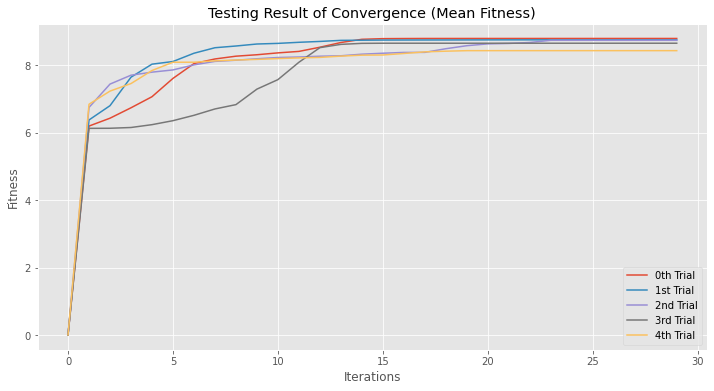

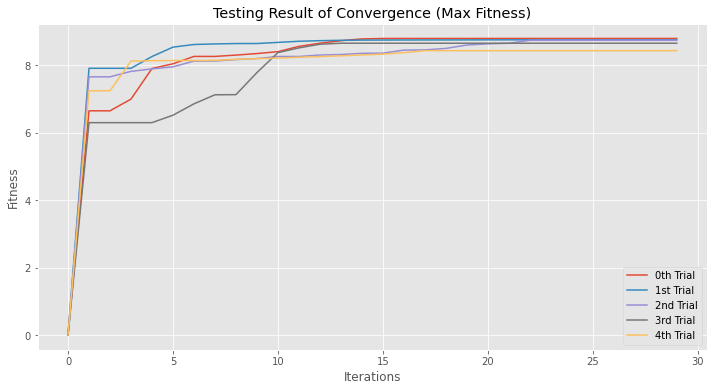

In [ ]:
# Melakukan pengujian konvergensi PSO dengan FnMyIPSO_DLeLM_UjiKonv +
# Simpan hasil dalam csv dan grafik fitness dlm *.jpg
# 
nCoba = 5
IterMaxPSO = 30
pop_size = 5

# get_Gbest_cell =np.zeros((nCoba,),dtype=np.object)
# kesetaraan cell dgn dict
get_all_Gbest_on_cell={}
get_all_FitnessGbest_on_cell={}
get_all_get_y_topi_on_cell={}
get_all_MeanFitness_on_cell={}
get_all_MaxFitness_on_cell={}

# get_best_of_the_best_from_all =np.zeros((nCoba,),dtype=np.object)
get_best_of_the_best_from_all={}

for i in range(nCoba):
  get_all_Gbest_on_cell[i],\
  get_all_FitnessGbest_on_cell[i],\
  get_all_get_y_topi_on_cell[i],\
  get_all_MeanFitness_on_cell[i],\
  get_all_MaxFitness_on_cell[i] = \
  FnMyIPSO_DLeLM_UjiKonv(IterMaxPSO,pop_size,byk_fitur_by_rdd,info_minimize_maximize,get_bobot,get_bias,get_output_weight)

  #get best of the best from all Gbest (included Y_topi & fitness nya)
  # get_best_of_the_best_from_all[i]={}
  if i==0:
    get_best_of_the_best_from_all['Gbest'] = get_all_Gbest_on_cell[i]
    get_best_of_the_best_from_all['FitnessGbest'] = [get_all_FitnessGbest_on_cell[i]]
    get_best_of_the_best_from_all['y_topi'] = get_all_get_y_topi_on_cell[i].value
  else:
    if(get_best_of_the_best_from_all['FitnessGbest'][0] < get_all_FitnessGbest_on_cell[i]):
      get_best_of_the_best_from_all['Gbest'] = get_all_Gbest_on_cell[i]
      get_best_of_the_best_from_all['FitnessGbest'] = [get_all_FitnessGbest_on_cell[i]]
      get_best_of_the_best_from_all['y_topi'] = get_all_get_y_topi_on_cell[i].value

print()
print('Get best of the best from all Gbest (included Y_topi & fitness nya):')
print('-----'*20)
print('Gbest = ',get_best_of_the_best_from_all['Gbest'].round(2))
print('FitnessGbest = ',get_best_of_the_best_from_all['FitnessGbest'][0].round(2))
print('y_topi = ',get_best_of_the_best_from_all['y_topi'].round(2))

print()

# ---------------------------------------------

# Buat Folder, dgn name_unik_path2save utk simpan hasil style transfer dan total loss-nya
name_unik_path2save = str(datetime.today().astimezone(pytz.timezone('Asia/Jakarta')).strftime('%d-%m-%Y-%H-%M-%S'))
# import os
# os.chdir("/content/drive/My Drive")
if not os.path.exists('./testing of convergence/'+name_unik_path2save):
  os.makedirs('./testing of convergence/'+name_unik_path2save)
  #print('Path blm ada')
else:
  print('Path sdh ada')
# os.chdir("/content/drive/My Drive/KeStar_Algorithm")
# !pwd

# set info_param
# nt mewakili parameter nCoba
# it mewakili parameter IterMaxPSO
# po mewakili pop_size
# gyf mewakili best of the best dari Gbest, lalu Y_Topi, lalu Fitness
info_param = 'nt-'+str(nCoba)+'-it-'+str(IterMaxPSO)+'-po-' \
+str(pop_size)+'-gyf'

nama_path_hasil = './testing of convergence/'+name_unik_path2save+'/'
nama_file_jpg_MeanFitness = nama_path_hasil+info_param+'_MeanFitness.jpg'
style.use('ggplot')
fig, ax = plt.subplots(figsize=(12, 6))    
plt.title("Testing Result of Convergence (Mean Fitness)")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
# plt.xlim(1,IterMaxPSO)
# plt.xlim(1,len(get_all_MeanFitness_on_cell[0]))
for loss,lab in zip(get_all_MeanFitness_on_cell,np.arange(nCoba)):
  plt.plot(get_all_MeanFitness_on_cell[loss],label= humanize.ordinal(lab) +' Trial')
  # plt.legend(loc='upper right')
  plt.legend(loc='lower right')
plt.savefig(nama_file_jpg_MeanFitness,dpi=100)
plt.show()

print()

nama_file_jpg_MaxFitness = nama_path_hasil+info_param+'_Maxitness.jpg'
style.use('ggplot')
fig, ax = plt.subplots(figsize=(12, 6))    
plt.title("Testing Result of Convergence (Max Fitness)")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
# plt.xlim(1,IterMaxPSO)
# plt.xlim(1,len(get_all_MeanFitness_on_cell[0]))
for loss,lab in zip(get_all_MaxFitness_on_cell,np.arange(nCoba)):
  plt.plot(get_all_MaxFitness_on_cell[loss],label= humanize.ordinal(lab) +' Trial')
  # plt.legend(loc='upper right')
  plt.legend(loc='lower right')
plt.savefig(nama_file_jpg_MaxFitness,dpi=100)
plt.show()

plt.style.use('default')

# Simpan Hasil Gbest Fitness , nantinya 'MeanFitness' dan 'MaxFitness' utk grafik evaluasi
nama_file_csv_GFY = nama_path_hasil+info_param+'_Gbest_FitnessGbest_Y_Topi.csv'
# np.savetxt(nama_file_csv_GFY, get_best_of_the_best_from_all, fmt="%d", delimiter=",")
# np.savetxt('Gbest_FitnessGbest_Y_Topi.csv', get_best_of_the_best_from_all, fmt="%d", delimiter=",")

nama_file_csv_MeanFitness= nama_path_hasil+info_param+'_MeanFitness.csv'
# np.savetxt(nama_file_csv_MeanFitness, get_all_MeanFitness_on_cell, fmt="%d", delimiter=",")
# np.savetxt('MeanFitness.csv', get_all_MeanFitness_on_cell, fmt="%d", delimiter=",")

nama_file_csv_MaxFitness= nama_path_hasil+info_param+'_MaxFitness.csv'
# np.savetxt(nama_file_csv_MaxFitness, get_all_MaxFitness_on_cell, fmt="%d", delimiter=",")
# np.savetxt('MaxFitness.csv', get_all_MaxFitness_on_cell, fmt="%d", delimiter=",")

# --------------------------
# untuk Gbest_FitnessGbest_Y_Topi
# keys = sorted(get_best_of_the_best_from_all.keys())
transposed_data = list(zip_longest(*get_best_of_the_best_from_all.values()))
# with open('Gbest_FitnessGbest_Y_Topi.csv', 'w', newline='') as f:
with open(nama_file_csv_GFY, 'w', newline='') as f:
  writer = csv.writer(f)
  writer.writerow(get_best_of_the_best_from_all.keys())
  # writer.writerow(keys)
  for items in transposed_data:
    writer.writerow(items)

# untuk MeanFitness
keys = sorted(get_all_MeanFitness_on_cell.keys())
rename_header=[]
for key in keys:
  rename_header.append(str(humanize.ordinal(int(key))) +' Trial')
transposed_data = list(zip_longest(*get_all_MeanFitness_on_cell.values()))
# with open('MeanFitness.csv', 'w', newline='') as f:
with open(nama_file_csv_MeanFitness, 'w', newline='') as f:
  writer = csv.writer(f)
  # coba rename header :D
  writer.writerow(rename_header)
  for items in transposed_data:
    writer.writerow(items)

# untuk MaxFitness
keys = sorted(get_all_MaxFitness_on_cell.keys())
rename_header=[]
for key in keys:
  rename_header.append(str(humanize.ordinal(int(key))) +' Trial')
transposed_data = list(zip_longest(*get_all_MaxFitness_on_cell.values()))
# with open('MaxFitness.csv', 'w', newline='') as f:
with open(nama_file_csv_MaxFitness, 'w', newline='') as f:
  writer = csv.writer(f)
  # coba rename header :D
  writer.writerow(rename_header)
  for items in transposed_data:
    writer.writerow(items)

In [ ]:
#Ref:
# 1. https://mediatemple.net/community/products/developer/204405534/install-nginx-on-ubuntu
# 2. https://dev.to/jackfiallos/create-your-own-tunnelling-like-ngrok-does-kg4
# 3. https://medium.com/better-programming/create-your-own-public-url-for-localhost-like-ngrok-with-https-your-own-domain-45c343750e7e
# 4. https://www.digitalocean.com/community/questions/self-hosted-ngrok-or-serveo-alternative
# 5. https://chenhuijing.com/blog/tunnelling-services-for-exposing-localhost-to-the-web/
# 6. https://github.com/devansh42/shree
# 7. https://www.softwaretestinghelp.com/ngrok-alternatives/
# 8. others